In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
df['target'] = iris.target

In [9]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [10]:
df[df.target==2].head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2


In [11]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])

In [12]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [15]:
df0.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


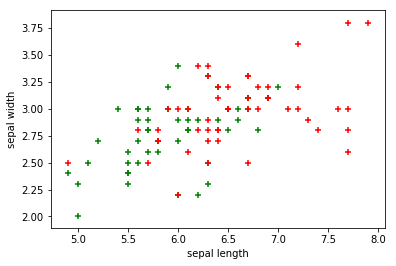

In [16]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='+')

In [17]:
x = df.drop(['target','flower_name'],axis='columns')
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [18]:
y = df.target

In [19]:
y.head(2)

0    0
1    0
Name: target, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
len(x_train)

120

In [23]:
len(x_test)

30

In [24]:
from sklearn.svm import SVC

In [25]:
model = SVC()

In [26]:
model.fit(x_train,y_train)

C:\Users\Thukaram\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

model.score(x,y)

In [27]:
model.score(x_test,y_test)*100

100.0

In [28]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [29]:
import numpy as np
x_in=np.array([6.3,3.3,6.0,2.5])

In [30]:
y_ot = model.predict([x_in])
y_ot

array([2])